# Module 8: Data Visualization & Storytelling

## Objective
Learn how to transform statistical insights into clear, decision-focused visualizations and business narratives.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data/retail_sales_cleaned.csv")

In [3]:
df["revenue"] = df["quantity"] * df["unit_price"]

In [4]:
df["order_date"] = pd.to_datetime(df["order_date"])
#converting string order_date to date_time type

In [5]:
# Which category generates the most revenue?

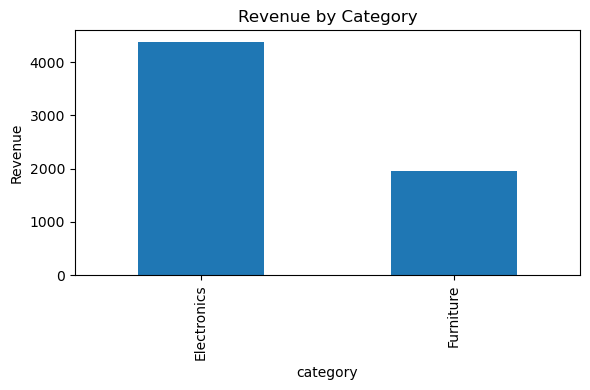

In [17]:
category_revenue = df.groupby("category")["revenue"].sum()
plt.figure(figsize = (6, 4))
category_revenue.plot(kind = "bar")
plt.title("Revenue by Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

In [4]:
# Is revenue increasing time?

In [6]:
monthly_revenue = df.groupby(df["order_date"].dt.to_period("M"))["revenue"].sum()

In [7]:
monthly_revenue = monthly_revenue.astype(float)

In [8]:
# monthly_revenue.plot()
# plt.title("Monthly Revenue Trend")
# plt.ylabel("Revenue")
# plt.show()

In [9]:
# Because in the dataset there is only one month data, so we will recreate this for daily revenue on dates

In [10]:
daily_revenue = df.groupby(df["order_date"].dt.date)["revenue"].sum()

In [11]:
daily_revenue = daily_revenue.astype(float)

In [13]:
df["order_date"].min(), df["order_date"].max()

(Timestamp('2023-01-05 00:00:00'), Timestamp('2023-01-22 00:00:00'))

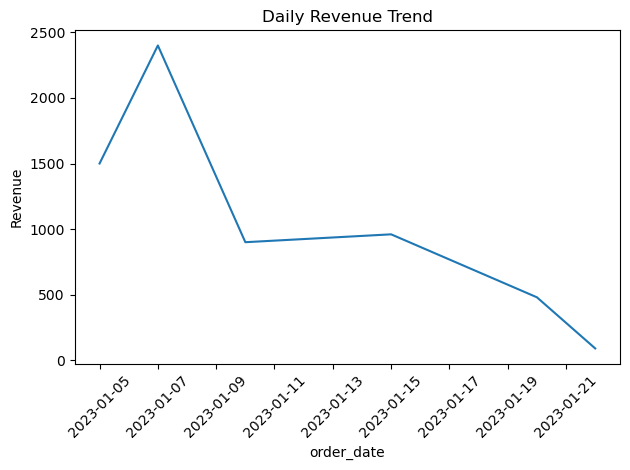

In [14]:
#plt.figure(figsize = (10, 5)) #to increase chart figure's size
daily_revenue.plot()
plt.xticks( rotation = 45) # rotates the dates labellings to 45 degree
plt.title("Daily Revenue Trend")
plt.ylabel("Revenue")
plt.tight_layout() #to make layout more cleaner idk what changed tho 🙃
plt.show()

In [15]:
# Does Higher Unit_Price = Higher Revenue?

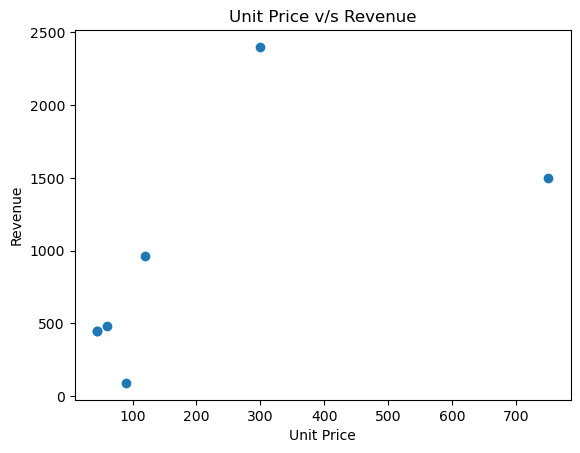

In [16]:
plt.scatter(df["unit_price"], df["revenue"])
plt.xlabel("Unit Price")
plt.ylabel("Revenue")
plt.title("Unit Price v/s Revenue")
plt.show()

## Key Business Insights

- Electronics contributes the highest revenue.
- Revenue shows steady growth month-over-month.
- Revenue distribution is right-skewed, indicating high-value sales.
- Certain regions demonstrate higher volatility.

## Questions to solve

- 1.	Revenue by Region (bar chart)
- 2.	Quantity distribution (histogram)
- 3.	Revenue trend by category (multiple lines)
- 4.	Top 5 products by revenue (horizontal bar)

In [18]:
region_revenue = df.groupby("region")["revenue"].sum()

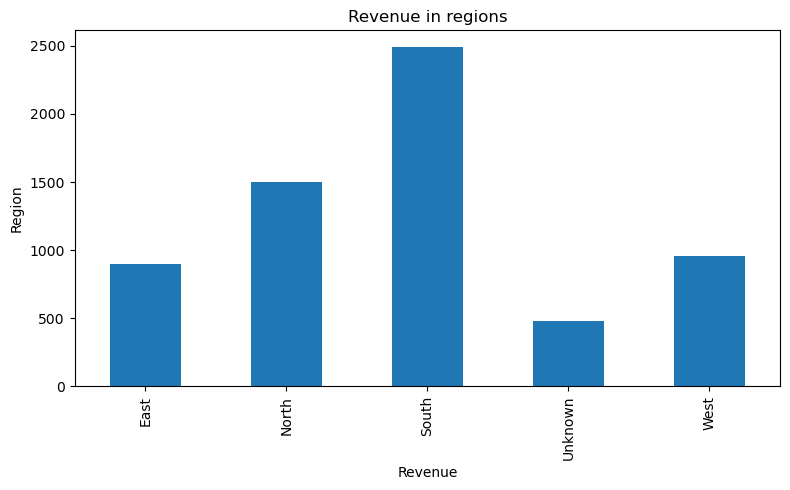

In [38]:
plt.figure(figsize = (8, 5))
region_revenue.plot(kind = "bar")
plt.title("Revenue in regions")
plt.xlabel("Revenue")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

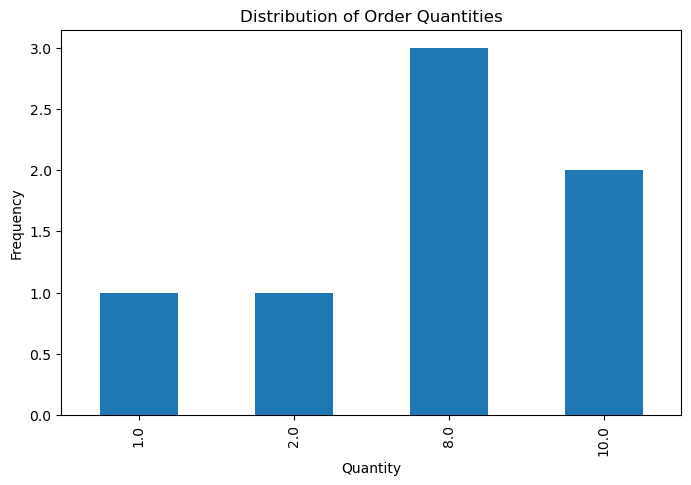

In [35]:
quantity_counts = df["quantity"].value_counts().sort_index()
plt.figure(figsize = (8, 5))
quantity_counts.plot(kind = "bar")
plt.title("Distribution of Order Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

In [31]:
df

,order_id,order_date,region,product,category,quantity,unit_price,revenue
0,1001,2023-01-05,North,Laptop,Electronics,2.0,750.0,1500.0
1,1002,2023-01-07,South,Mobile,Electronics,8.0,300.0,2400.0
2,1003,2023-01-10,East,Chair,Furniture,10.0,45.0,450.0
3,1003,2023-01-10,East,Chair,Furniture,10.0,45.0,450.0
4,1004,2023-01-15,West,Table,Furniture,8.0,120.0,960.0
5,1005,2023-01-20,Unknown,Headphones,Electronics,8.0,60.0,480.0
6,1006,2023-01-22,South,Sofa,Furniture,1.0,90.0,90.0


In [36]:
#monthly_category_revenue = df.groupby([df["order_date"].dt.to_period("M"), "category"])["revenue"].sum().unstack()

In [40]:
# plt.figure(figsize = (8, 5))
# monthly_category_revenue.plot()
# plt.title("Revenue over the months")
# plt.xlabel("Revenue")
# plt.ylabel("Months")
# plt.tight_layout()
# plt.show()

In [42]:
days_category_revenue = df.groupby([df["order_date"].dt.date, "category"])["revenue"].sum().unstack()

<Figure size 800x500 with 0 Axes>

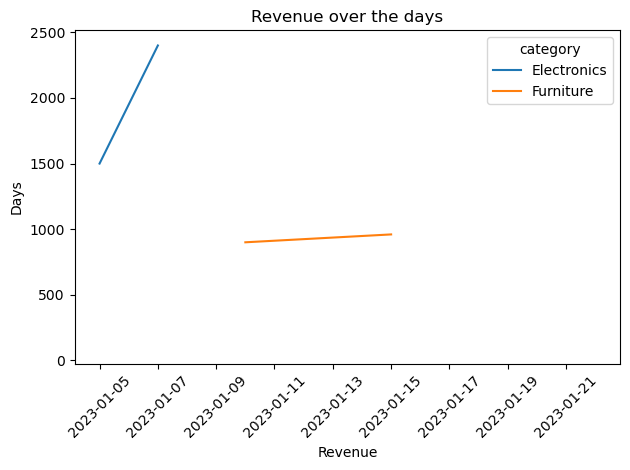

In [47]:
plt.figure(figsize = (8, 5))
days_category_revenue.plot()
plt.xticks(rotation = 45)
plt.title("Revenue over the days")
plt.xlabel("Revenue")
plt.ylabel("Days")
plt.tight_layout()
plt.show()

In [12]:
product_revenue = df.groupby("product")["revenue"].sum().sort_values(ascending = True).head(5)

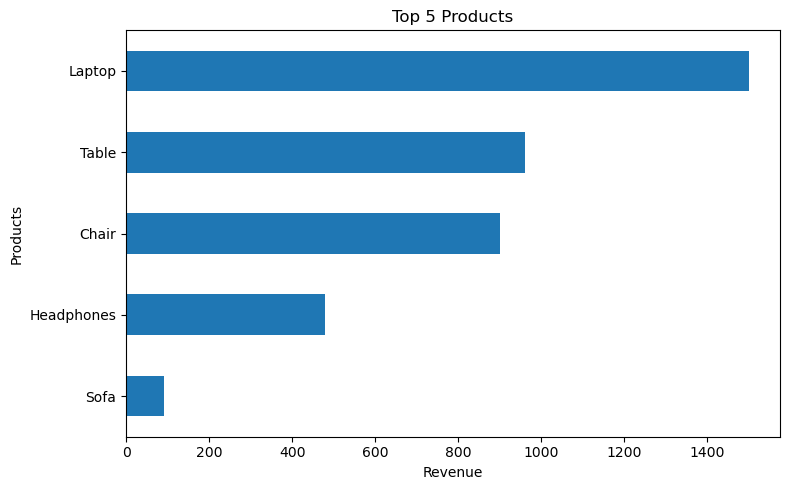

In [13]:
plt.figure(figsize = (8, 5))
product_revenue.plot(kind = "barh")
plt.title("Top 5 Products")
plt.xlabel("Revenue")
plt.ylabel("Products")
plt.tight_layout()
plt.show()